# EDA

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
# auto reload libs
%load_ext autoreload
%autoreload 2


## Paths

In [3]:
DATASET = "../data/heart_attack_prediction_dataset.csv"

## Load Data

In [4]:
df = pd.read_csv(DATASET)
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
df.shape

(8763, 26)

## Visualizations

### Age

In [7]:
df.Age.describe()

count    8763.000000
mean       53.707977
std        21.249509
min        18.000000
25%        35.000000
50%        54.000000
75%        72.000000
max        90.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

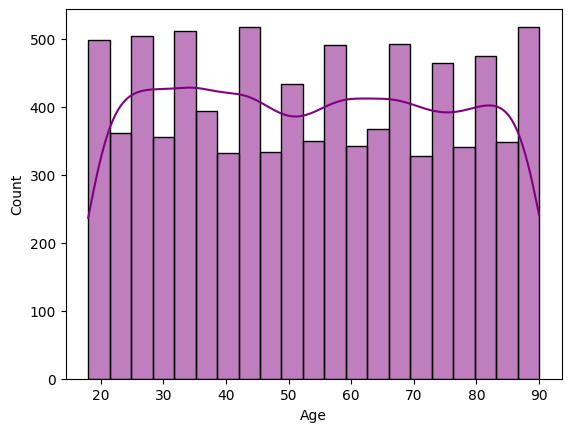

In [8]:
sns.histplot(df["Age"], kde=True, color="purple")

<Axes: xlabel='Age', ylabel='Count'>

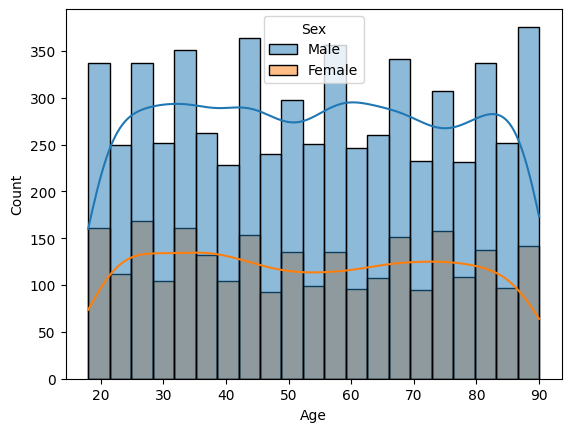

In [9]:
sns.histplot(df, x="Age", hue="Sex", kde=True)


In [10]:
df.Sex.value_counts()

Sex
Male      6111
Female    2652
Name: count, dtype: int64

### Stress level at different Age with Sex

In [11]:
df["age_group"] = pd.cut(
    df["Age"],
    bins=[18, 27, 36, 45, 54, 63, 72, 81, 90],
    labels=["18-27", "27-36", "36-45", "45-54", "54-63", "63-72", "72-81", "81-90"],
)
df["age_group"]


0       63-72
1       18-27
2       18-27
3       81-90
4       63-72
        ...  
8758    54-63
8759    27-36
8760    45-54
8761    27-36
8762    18-27
Name: age_group, Length: 8763, dtype: category
Categories (8, object): ['18-27' < '27-36' < '36-45' < '45-54' < '54-63' < '63-72' < '72-81' < '81-90']

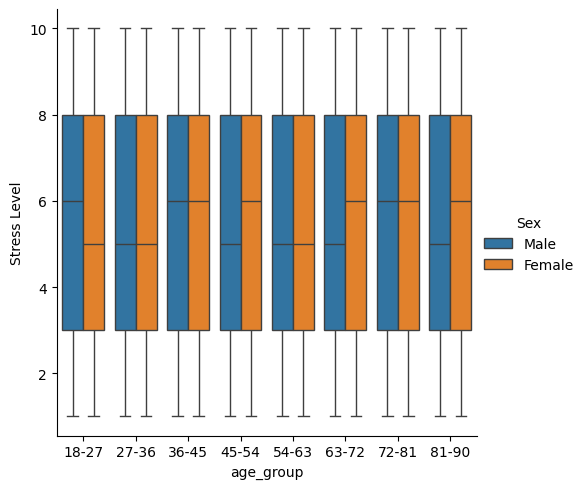

In [12]:
sns.catplot(data=df, x="age_group", y="Stress Level", kind="box", hue="Sex")


### Heart Attack Risk vs Sex

<Axes: xlabel='Heart Attack Risk', ylabel='Count'>

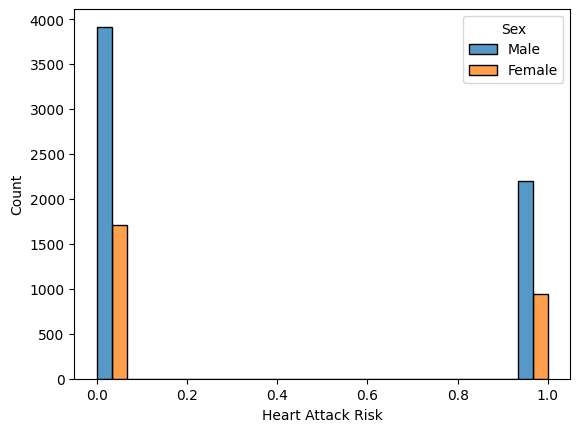

In [13]:
sns.histplot(data=df, hue="Sex", x="Heart Attack Risk", multiple="dodge")


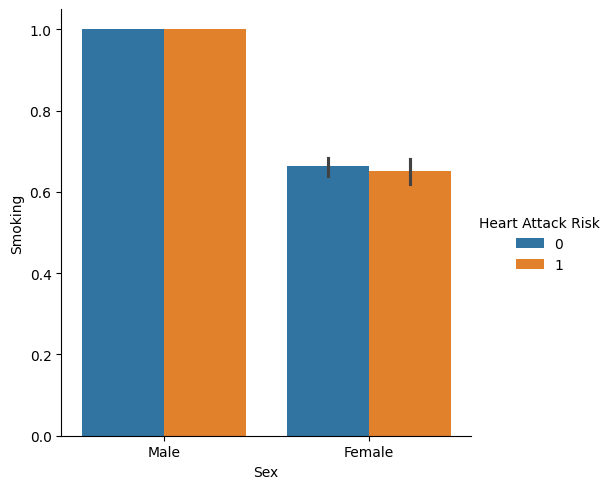

In [14]:
sns.catplot(data=df, x="Sex", y="Smoking", hue="Heart Attack Risk", kind="bar")

<Axes: xlabel='Smoking', ylabel='count'>

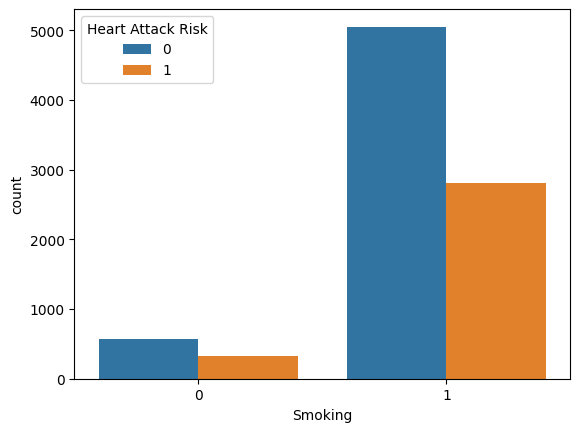

In [15]:
sns.countplot(data=df, x="Smoking", hue="Heart Attack Risk")


### Count Smockers

Male smockers

<Axes: xlabel='Smoking', ylabel='count'>

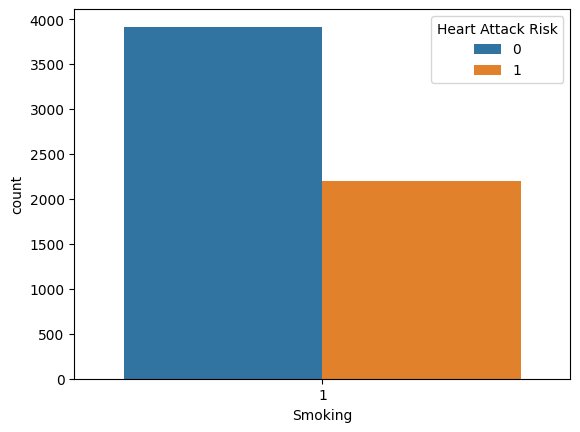

In [16]:
sns.countplot(data=df[df.Sex == "Male"], x="Smoking", hue="Heart Attack Risk")
# All the Males are smokers

In [17]:
# count male smockers
df[(df["Sex"] == "Male") & (df["Smoking"] == 1)].shape[0], df[(df["Sex"] == "Male") & (df["Smoking"] == 0)].shape[0]

(6111, 0)

Female Smockers

In [18]:
df[(df["Sex"] == "Female") & (df["Smoking"] == 1)].shape[0], df[(df["Sex"] == "Female") & (df["Smoking"] == 0)].shape[0]


(1748, 904)

<Axes: xlabel='Smoking', ylabel='count'>

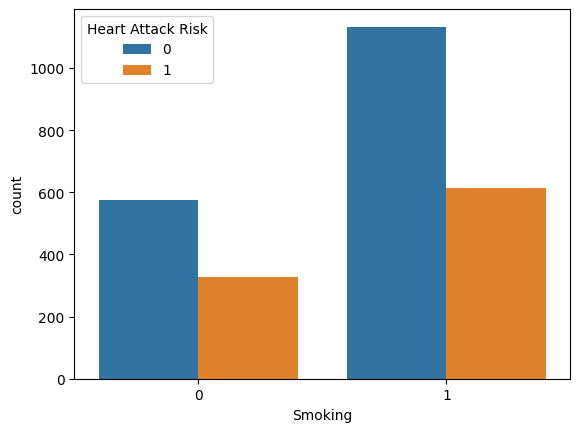

In [19]:
sns.countplot(data=df[df.Sex == "Female"], x="Smoking", hue="Heart Attack Risk")


it seems, smockers have drastically increase in Heart attack risk than non-smockers.

In [20]:
df["Heart Attack Risk"].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

### Diabetes vs Heart Attack Risk

<Axes: xlabel='Diabetes', ylabel='Count'>

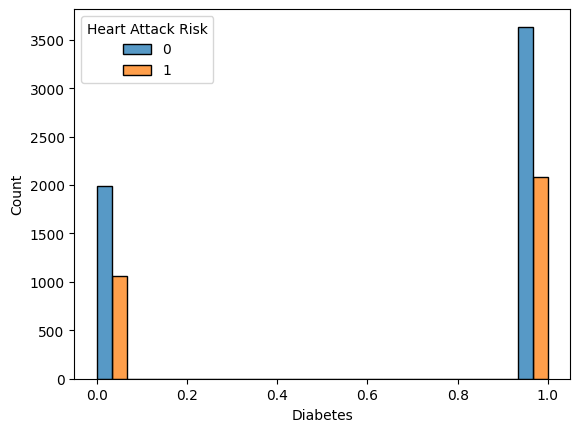

In [21]:
sns.histplot(df, x="Diabetes", hue="Heart Attack Risk", multiple="dodge")


### Physicall activity per week vs Heart Attack Risk

<Axes: xlabel='Physical Activity Days Per Week', ylabel='Count'>

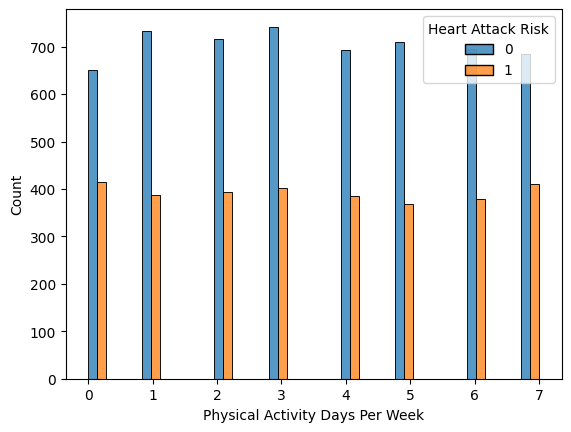

In [22]:
sns.histplot(df, x="Physical Activity Days Per Week", hue="Heart Attack Risk", multiple="dodge")

<Axes: xlabel='Exercise Hours Per Week', ylabel='Count'>

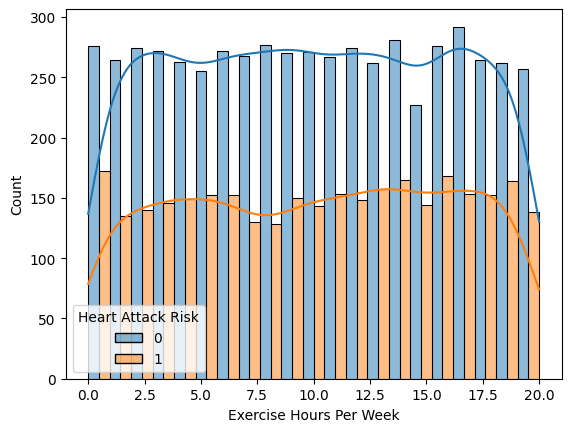

In [23]:
sns.histplot(df, x="Exercise Hours Per Week", hue="Heart Attack Risk", multiple="dodge", kde=True)


<Axes: xlabel='Sedentary Hours Per Day', ylabel='Count'>

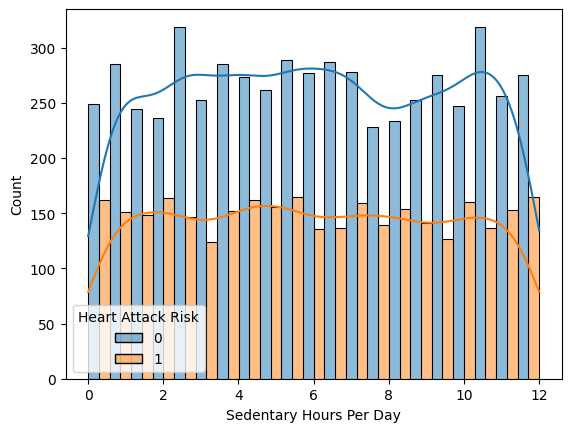

In [24]:
sns.histplot(df, x="Sedentary Hours Per Day", hue="Heart Attack Risk", multiple="dodge", kde=True)


<Axes: xlabel='Sleep Hours Per Day', ylabel='Count'>

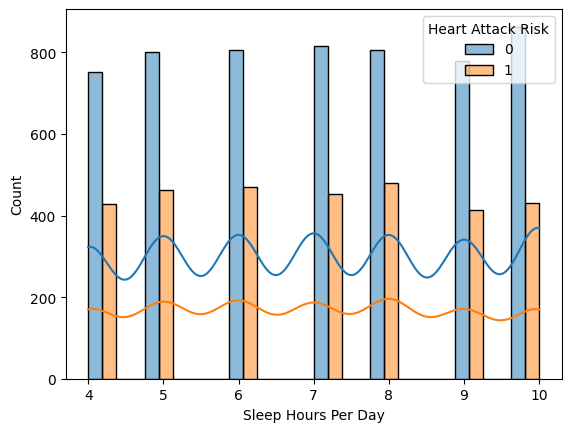

In [25]:
sns.histplot(df, x="Sleep Hours Per Day", hue="Heart Attack Risk", multiple="dodge", kde=True)


### Income vs Heart Attack Risk

<Axes: xlabel='Income', ylabel='Count'>

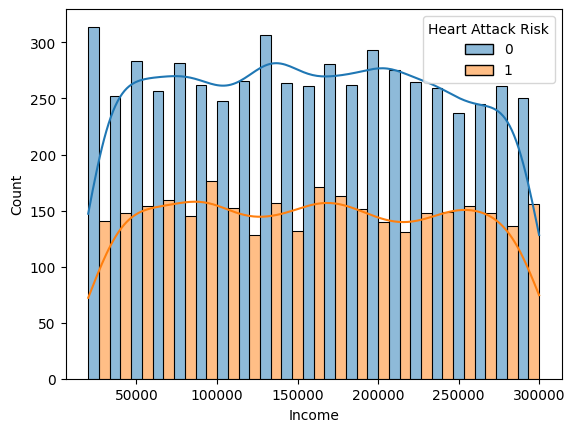

In [26]:
sns.histplot(df, x="Income", hue="Heart Attack Risk", multiple="dodge", kde=True)


### BMI vs Heart Attack Risk

<Axes: xlabel='BMI', ylabel='Count'>

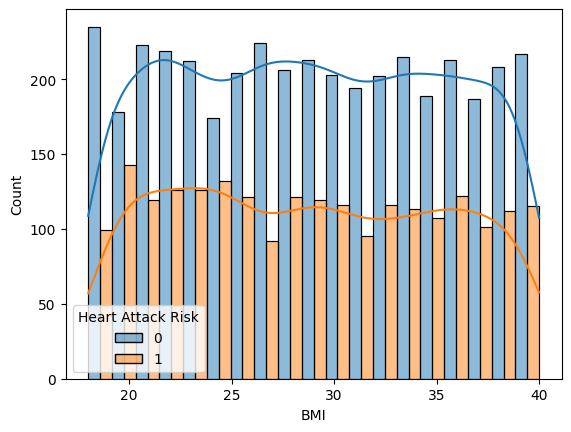

In [27]:
sns.histplot(df[df.Sex == "Male"], x="BMI", hue="Heart Attack Risk", multiple="dodge", kde=True)


<Axes: xlabel='BMI', ylabel='Count'>

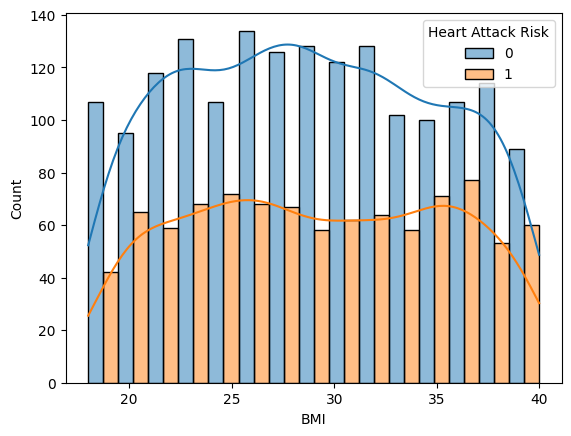

In [28]:
sns.histplot(df[df.Sex == "Female"], x="BMI", hue="Heart Attack Risk", multiple="dodge", kde=True)


### Obesity vs Heart Attack Risk

In [29]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'age_group'],
      dtype='object')

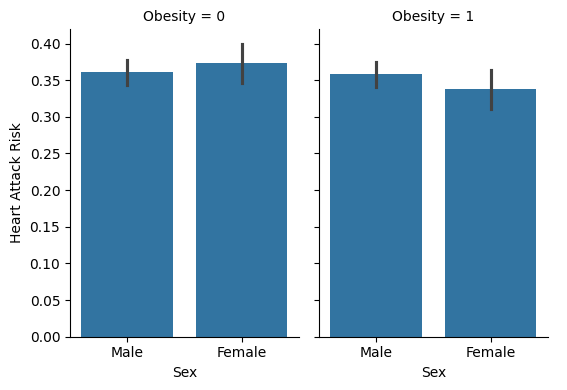

In [30]:
# sns.histplot(df[df.Sex == "Male"], x="Obesity", hue="Heart Attack Risk", multiple="dodge")
sns.catplot(data=df, x="Sex", y="Heart Attack Risk", col="Obesity", kind="bar", height=4, aspect=0.7)


<Axes: xlabel='Obesity', ylabel='Count'>

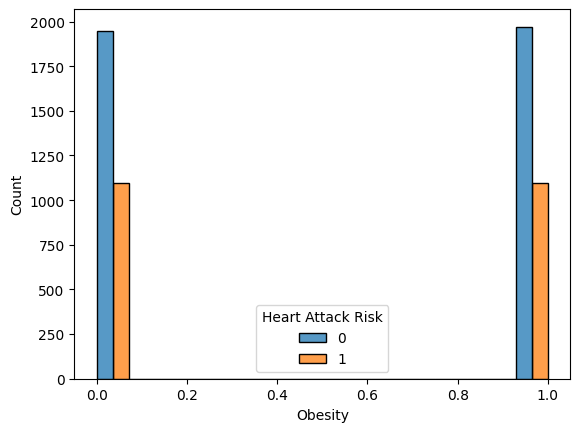

In [31]:
sns.histplot(df[df.Sex == "Male"], x="Obesity", hue="Heart Attack Risk", multiple="dodge")


<Axes: xlabel='Obesity', ylabel='Count'>

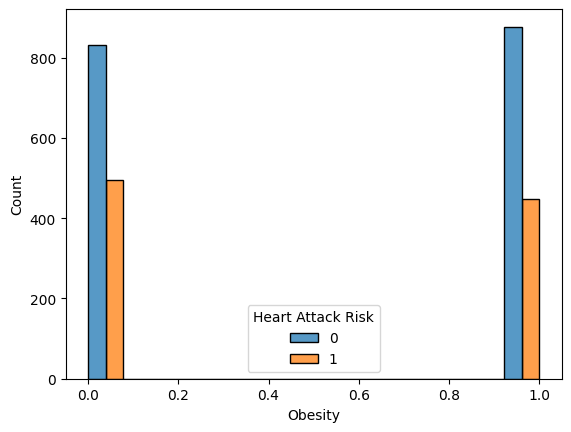

In [32]:
sns.histplot(df[df.Sex == "Female"], x="Obesity", hue="Heart Attack Risk", multiple="dodge")
